# **Lab 1.1 : Multilayer Perceptron (MLP)**

In [1]:
import tensorflow as tf
tf.__version__

'2.17.0'

## **Step 1: Import library**




In [2]:
import numpy as np
from numpy.random import seed
seed(42)
import tensorflow as tf


from tensorflow.keras.layers import Dense,Input, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

# New Section

In [3]:
nb_epochs = 35
batch_size = 32
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}


In [4]:
cifar = tf.keras.datasets.cifar10

## **Step 2: Load data**

In [5]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000,)

In [8]:
y_test.shape

(10000,)

## **Step 3: Visualize example data**

In [9]:
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)

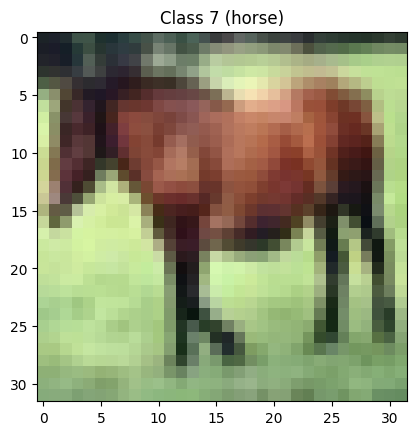

In [10]:
draw_img(7)

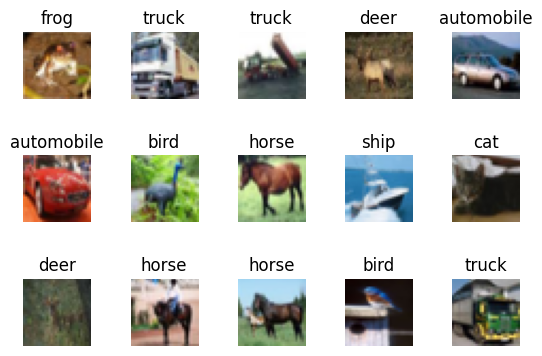

In [11]:
draw_sample(x_train, y_train, 0, 3, 5)

## **Step 4: Create Multilayer Perceptron Model**

> Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.



Overfit

In [12]:
input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(32, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs = input, outputs = prediction)

## **Step 5: Loss,  Optimizer, Early stopping**

In [13]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Step 6: Fit model**

In [14]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2021 - loss: 2.1440 - val_accuracy: 0.2339 - val_loss: 2.0132 - learning_rate: 0.0010
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2431 - loss: 1.9787 - val_accuracy: 0.2520 - val_loss: 1.9481 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2480 - loss: 1.9537 - val_accuracy: 0.2441 - val_loss: 1.9389 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2489 - loss: 1.9317 - val_accuracy: 0.2548 - val_loss: 1.9246 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2544 - loss: 1.9318 - val_accuracy: 0.2535 - val_loss: 1.9197 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2577 - loss: 1.9258 - val_accuracy: 0.2511 - val_loss: 1.9203 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2589 - l

## **Step 7: Plot loss and accuracy**


In [15]:
history_dict = h.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0, 0.5, 'Loss')

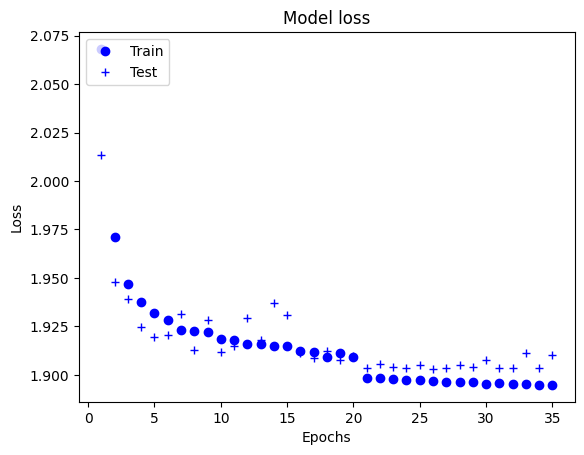

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

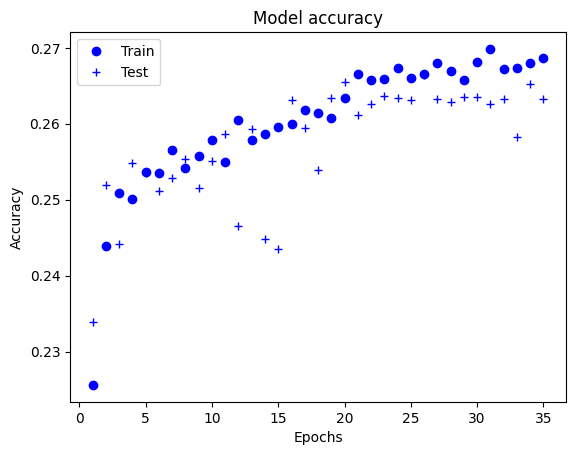

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

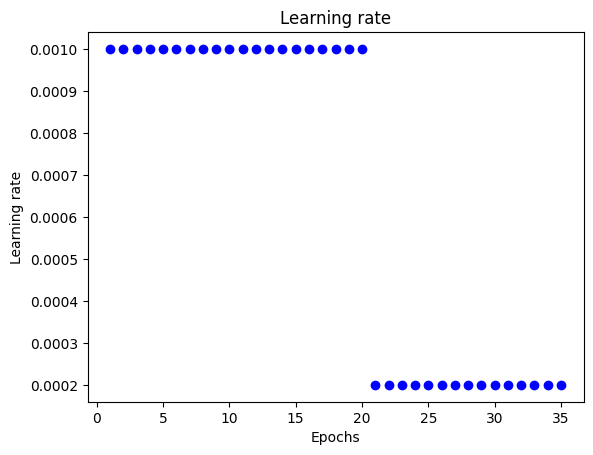

In [18]:
lr_values = history_dict['learning_rate']

plt.plot(epochs, lr_values, 'bo')
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')

plt.show()

## **Step 8: Evaluate**

In [19]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.265460  ;  loss = 1.898856


In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.263300  ;  loss = 1.910147


## **Step 9 : Confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


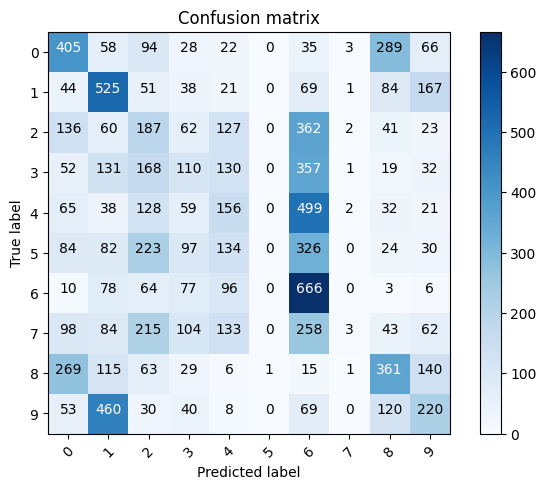

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Lab 1.2 : Add Dropout**

## **Step 10 : Add Dropout**

> Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.



In [22]:
input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)
prediction = Dense(10, activation='softmax')(x)
model_2 = Model(inputs = input, outputs = prediction)

In [23]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
h_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2466 - loss: 2.0734 - val_accuracy: 0.3375 - val_loss: 1.7929 - learning_rate: 0.0010
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3267 - loss: 1.8498 - val_accuracy: 0.3744 - val_loss: 1.7312 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3521 - loss: 1.7755 - val_accuracy: 0.3932 - val_loss: 1.7090 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3696 - loss: 1.7317 - val_accuracy: 0.3967 - val_loss: 1.6847 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3712 - loss: 1.7245 - val_accuracy: 0.4182 - val_loss: 1.6470 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3861 - loss: 1.6917 - val_accuracy: 0.4347 - val_loss: 1.6044 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3977 - l

In [25]:
model_2.save_weights('myModel_adam.weights.h5')

In [26]:
history_dict_2 = h_2.history
history_dict_2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0, 0.5, 'Loss')

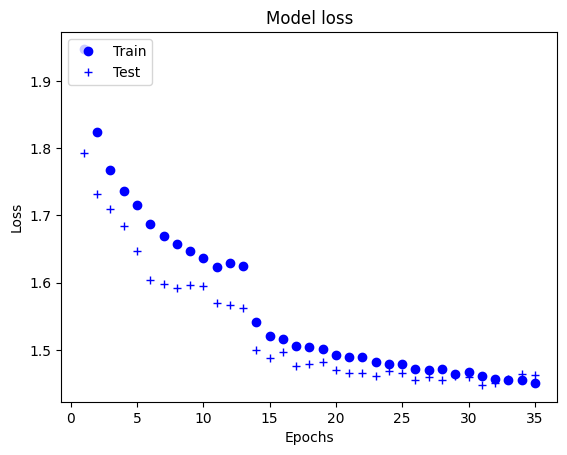

In [27]:
loss_values = history_dict_2['loss']
val_loss_values = history_dict_2['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

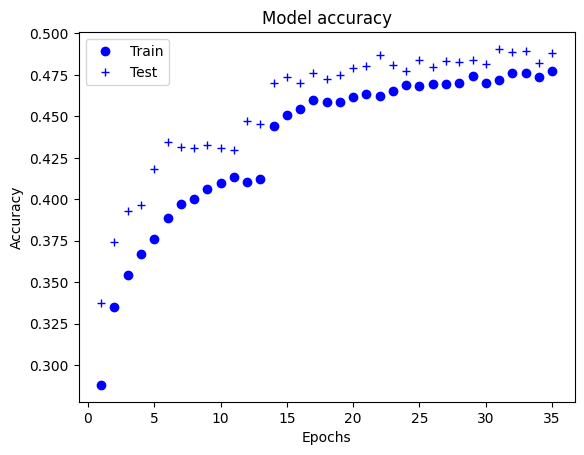

In [28]:
acc_values = history_dict_2['accuracy']
val_acc_values = history_dict_2['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [29]:
loss, accuracy = model_2.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.516500  ;  loss = 1.373979


In [30]:
loss, accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.487900  ;  loss = 1.462488


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


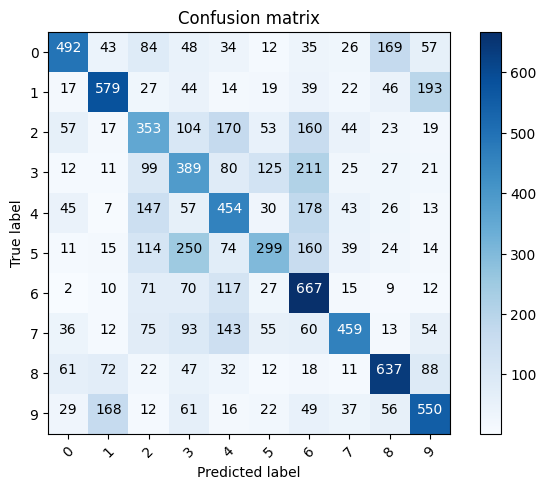

In [31]:
# Predict the values from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Step 11: Inspecting output**

In [32]:
predicted = model_2.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
print("Number of true predictions: ", len(correct_indices))
print("Number of false predictions:", len(incorrect_indices))

Number of true predictions:  4879
Number of false predictions: 5121


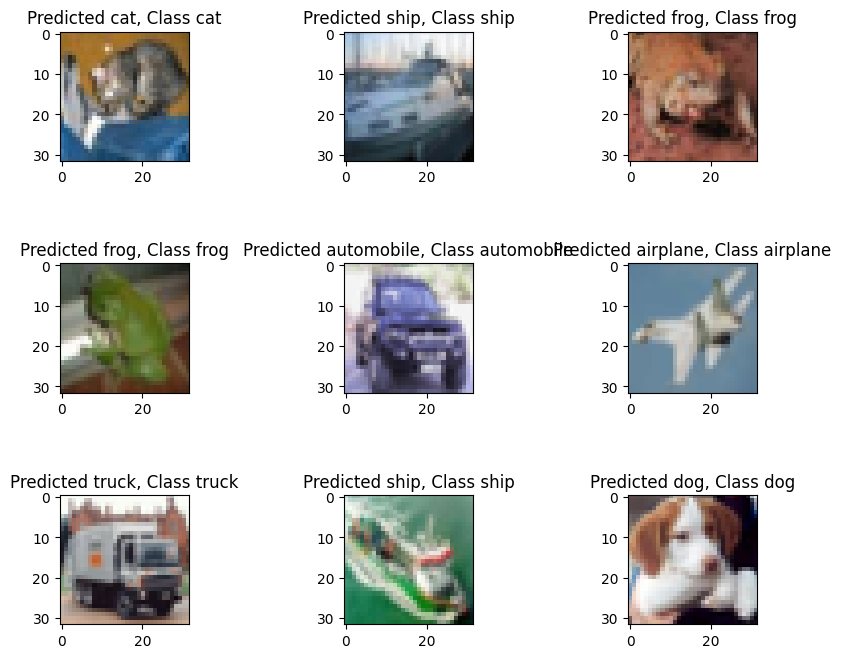

In [34]:
plt.rcParams['figure.figsize'] = (9,9)
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[correct]], class_name[y_test[correct]]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

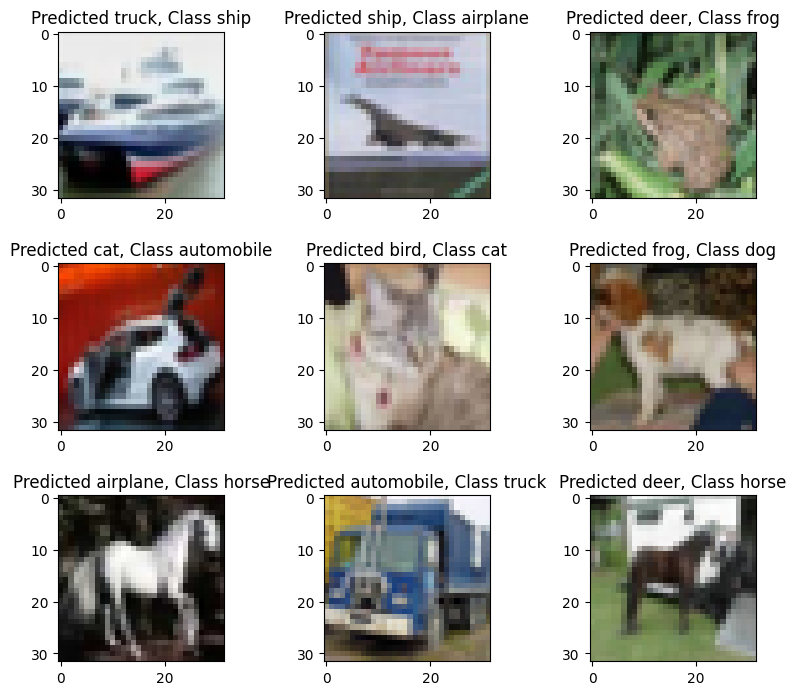

In [35]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[incorrect]], class_name[y_test[incorrect]]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)

# **Exercise**

Please complete this assignment on both datasets. The CNN (Convolutional Neural Networks) is not allowed.

## Mnist Data

```
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.
![Example Mnist dataset](https://drive.google.com/open?id=1EjLwrpjtoCgo6kgdVgaMVc-ATxKnGmtn)
```



In [36]:
nb_epochs = 300
batch_size = 32
nb_classes = 10

## Import Mnist Dataset

In [37]:
# To do
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### **Solution**

Click below for a solution

In [38]:
mnist = tf.keras.datasets.mnist

In [39]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

## Create Model MLP

In [40]:
# To Do
input = Input(shape = (28,28))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation='softmax')(x)
model_3 = Model(inputs = input, outputs = prediction)

### **Solution**

Click below for a solution






In [41]:
input = Input(shape = (28,28))
x = Flatten()(input)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation = 'softmax')(x)
model_3 = Model(inputs = input, outputs = prediction)

## Add Early stopping, Reduce learning rate and compile

In [42]:
# To Do
early_stopping = EarlyStopping(patience = 10, verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 10, min_lr = 0.001)
model_3.compile(optimizer  ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

### **Solution**

Click below for a solution

In [43]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.001)
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Fit model

In [44]:
# To Do
h_3 = model_3.fit(x_train, y_train,
                  batch_size = batch_size, epochs = nb_epochs,
                  validation_data = (x_test, y_test),
                  shuffle = True,
                  callbacks = [early_stopping,reduce_lr]
                  )

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8904 - loss: 0.3697 - val_accuracy: 0.9659 - val_loss: 0.1105 - learning_rate: 0.0010
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9677 - loss: 0.1049 - val_accuracy: 0.9716 - val_loss: 0.0913 - learning_rate: 0.0010
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0704 - val_accuracy: 0.9758 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0553 - val_accuracy: 0.9804 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0429 - val_accuracy: 0.9792 - val_loss: 0.0666 - learning_rate: 0.0010
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0345 - val_accuracy: 0.9800 - val_loss: 0.0693 - learning_rate: 0.0010
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9

### **Solution**

Click below for a solution

In [45]:
h_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data = (x_test, y_test), shuffle = True, callbacks = [early_stopping,reduce_lr])

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9829 - val_loss: 0.0988 - learning_rate: 0.0010
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9856 - val_loss: 0.0888 - learning_rate: 0.0010
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9823 - val_loss: 0.1042 - learning_rate: 0.0010
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9953 - loss: 0.0127 - val_accuracy: 0.9817 - val_loss: 0.1001 - learning_rate: 0.0010
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9816 - val_loss: 0.1027 - learning_rate: 0.0010
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9821 - val_loss: 0.1136 - learning_rate: 0.0010
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9

## Plot accuracy and loss

In [46]:
history_dict_3 = h_3.history
history_dict_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0, 0.5, 'Loss')

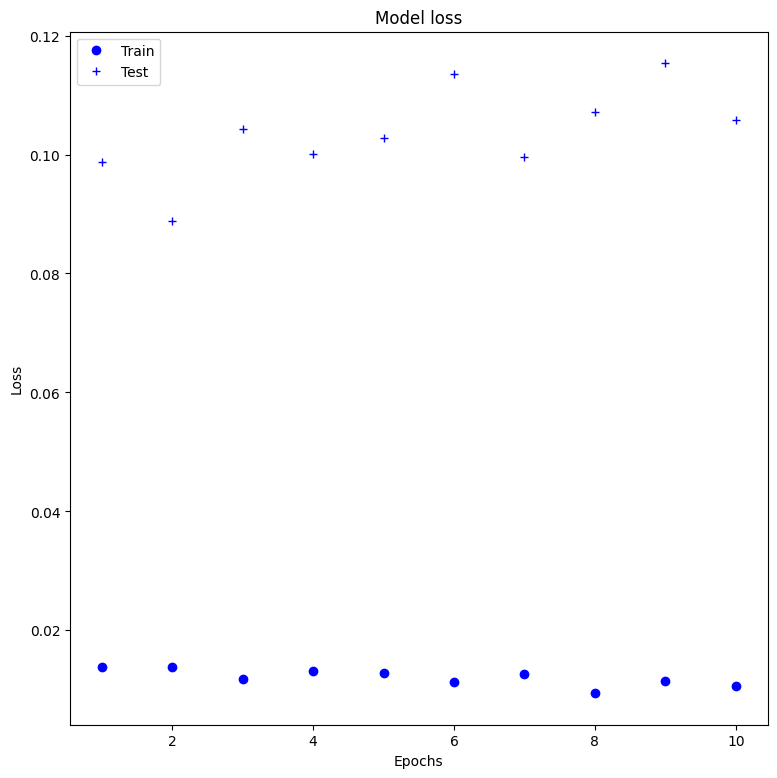

In [47]:
loss_values = history_dict_3['loss']
val_loss_values = history_dict_3['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

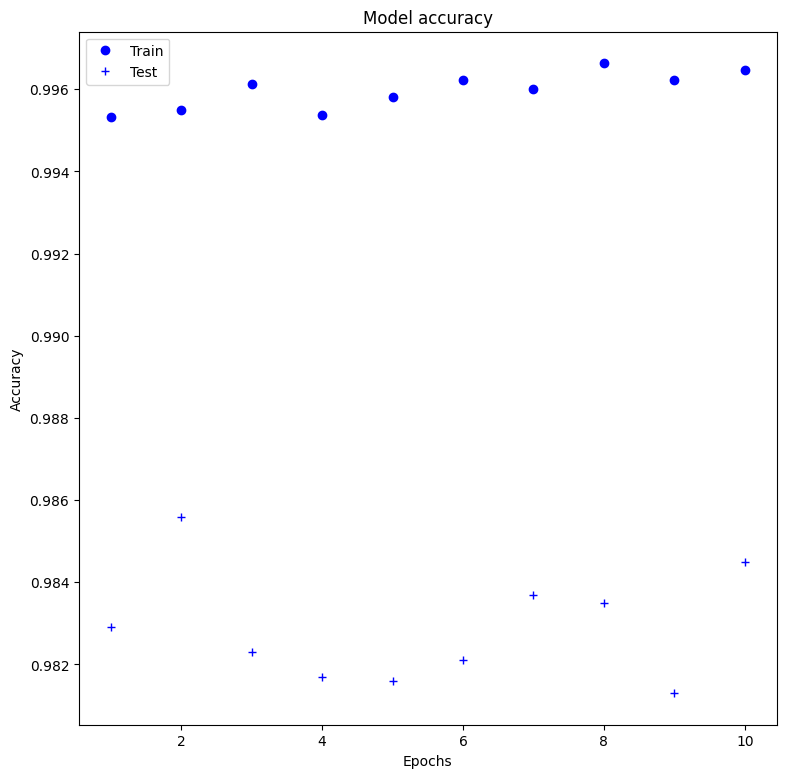

In [48]:
acc_values = history_dict_3['accuracy']
val_acc_values = history_dict_3['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Evaluate

In [49]:
# To Do
loss, accuracy = model_3.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999683  ;  loss = 0.001030


### **Solution**

Click below for a solution

In [50]:
loss, accuracy = model_3.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999683  ;  loss = 0.001030


In [51]:
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.984500  ;  loss = 0.105851


## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


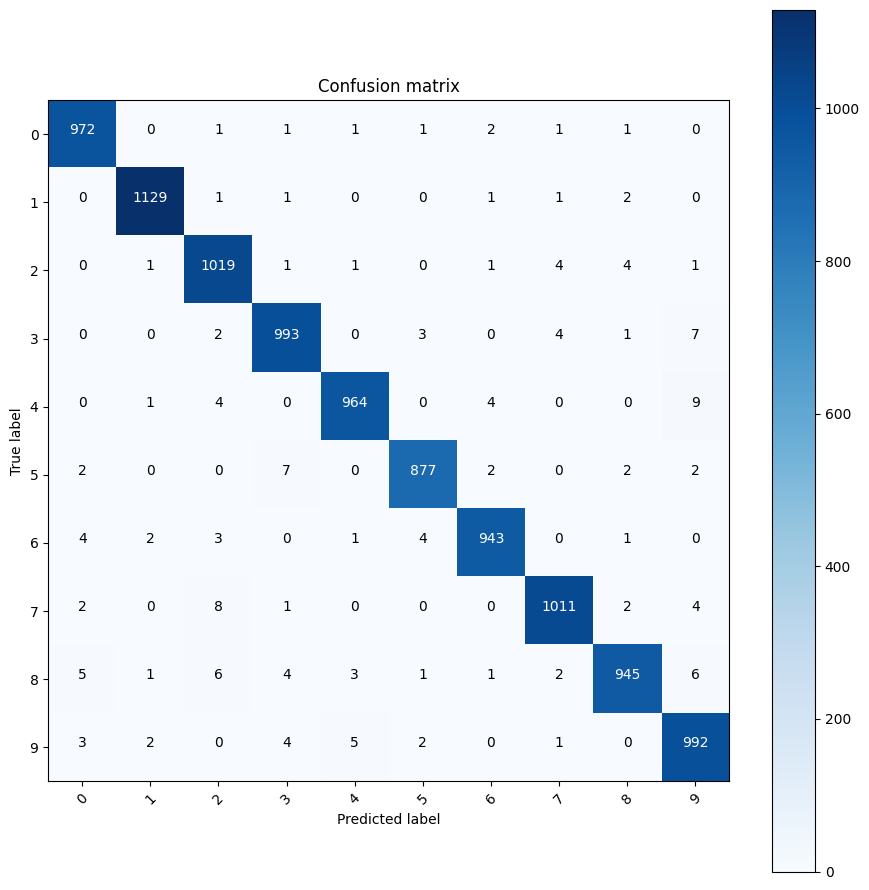

In [52]:
# Predict the values from the validation dataset
Y_pred = model_3.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Inspecting output

In [53]:
predicted = model_3.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices_2 = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices_2 = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
print("Number of true predictions: ", len(correct_indices_2))
print("Number of false predictions:", len(incorrect_indices_2))

Number of true predictions:  9845
Number of false predictions: 155


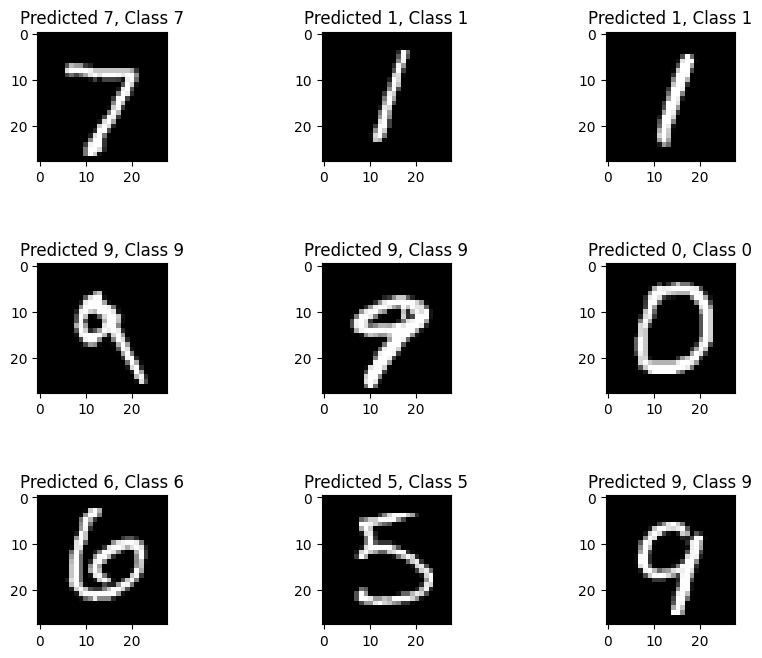

In [55]:
plt.rcParams['figure.figsize'] = (9,9)
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

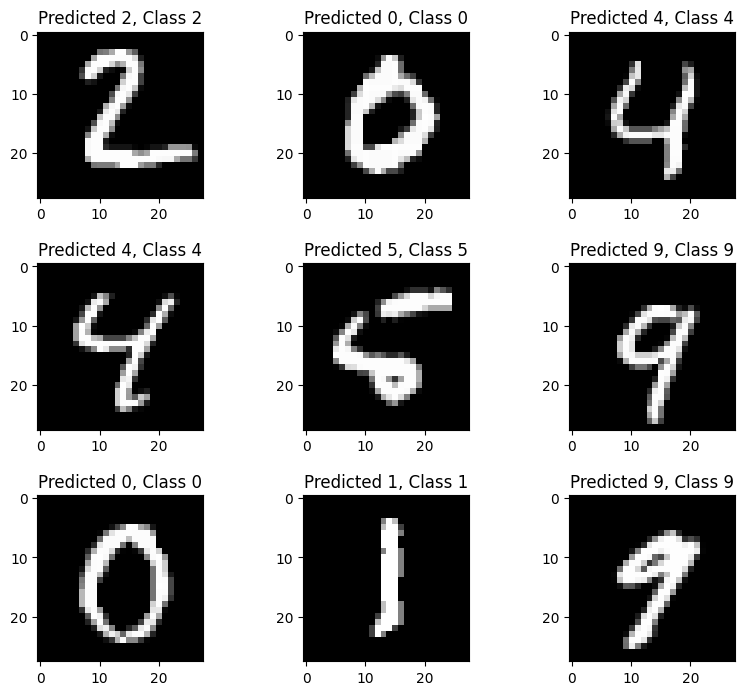

In [56]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)